## About the dataset:


#### The Austin Animal Center is the largest no-kill animal shelter in the United States that provides care and shelter to over 18,000 animals each year and is involved in a range of county, city, and state-wide initiatives for the protection and care of abandoned, at-risk, and surrendered animals.

#### As part of the City of Austin Open Data Initiative, the Austin Animal Center makes available its collected dataset that contains statistics and outcomes of animals entering the Austin Animal Services system.

## Content
#### The dataset contains shelter outcomes of several types of animals and breeds from 10/1/2013 to the present with a hourly time frequency. The data is updated daily.

# Exploring Dataset to find patterns


In [1]:
# Import modules 
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Read in dataset as df
df = pd.read_csv(r'D:\Google Drive\STUDY MAN\Institute of Data\Project 1 (EDA)\Data\aac_shelter_cat_outcome_eng.csv')

In [3]:
#Generating profile report for df
newdf = df.drop(axis = 1, labels = 'count')
pandas_profiling.ProfileReport(newdf)

# Column names

In [58]:
df['age_group'].unique()

array(['(-0.022, 2.2]', '(2.2, 4.4]', '(6.6, 8.8]', '(4.4, 6.6]',
       '(8.8, 11.0]', '(13.2, 15.4]', '(15.4, 17.6]', '(11.0, 13.2]',
       '(19.8, 22.0]', '(17.6, 19.8]'], dtype=object)

In [14]:
print(*df.columns, sep = '\n')

age_upon_outcome
animal_id
animal_type
breed
color
date_of_birth
datetime
monthyear
name
outcome_subtype
outcome_type
sex_upon_outcome
count
sex
Spay/Neuter
Periods
Period Range
outcome_age_(days)
outcome_age_(years)
Cat/Kitten (outcome)
sex_age_outcome
age_group
dob_year
dob_month
dob_monthyear
outcome_month
outcome_year
outcome_weekday
outcome_hour
breed1
breed2
cfa_breed
domestic_breed
coat_pattern
color1
color2
coat


# Looking for seasonal patterns in adoptions

<AxesSubplot:xlabel='outcome_month', ylabel='count'>

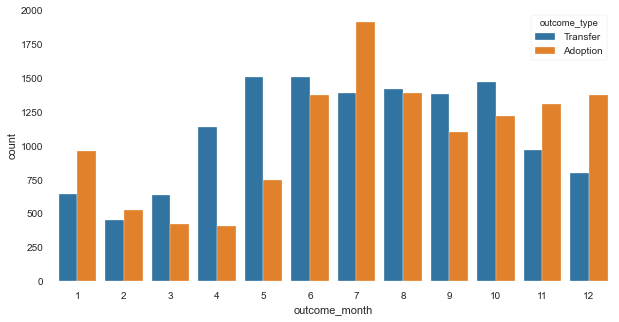

In [69]:
plt.figure(figsize = (10,5))
only_transfers_and_adoptions = df[df['outcome_type'].isin(['Transfer','Adoption'])]
sns.countplot(data = only_transfers_and_adoptions,
              x = 'outcome_month',
              hue = 'outcome_type')

# More adoptions in July. Check for seasonal fluctuations in population?

<AxesSubplot:xlabel='dob_month', ylabel='count'>

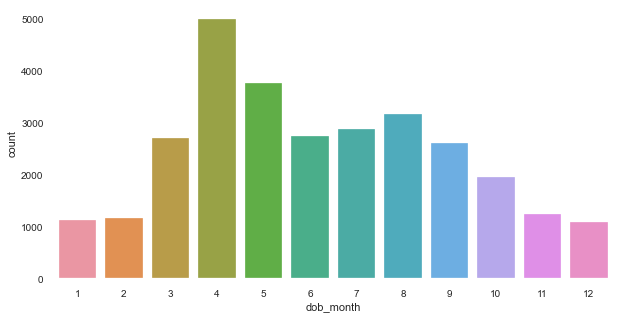

In [74]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,
              x = 'dob_month'
              )

<AxesSubplot:xlabel='age_group', ylabel='count'>

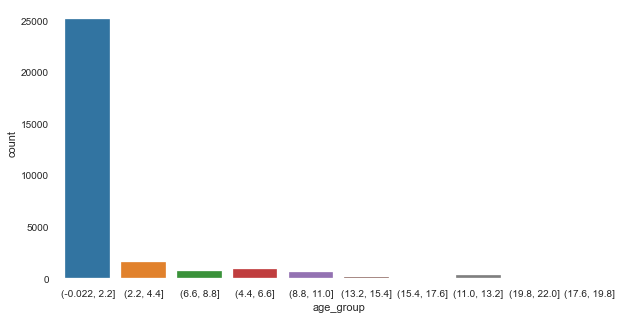

In [61]:
plt.figure(figsize = (10,5))
sns.countplot(df['age_group'])

# Many cats born in April/May, and most people like to adopt kittens. May explain why there are many adoptions in July

# Examining outcomes

In [19]:
df['outcome_type'].unique()

array(['Transfer', 'Adoption', 'Return to Owner', 'Died', 'Euthanasia',
       'Missing', 'Disposal', 'Rto-Adopt', nan], dtype=object)

<AxesSubplot:xlabel='outcome_type', ylabel='count'>

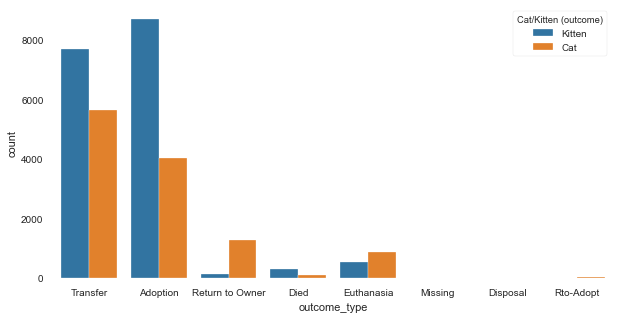

In [51]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,
              x = 'outcome_type',
              hue = r'Cat/Kitten (outcome)')
